In [2]:
!pip install WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 2.4 MB/s eta 0:00:00 0:00:01


In [4]:
# Import the necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud
from collections import Counter
import nltk #NLTK: Natural Language Toolkit
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import joblib 

In [5]:
# Download necessary nltk data
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abisheklimbu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
# Load datasets
url = "https://raw.githubusercontent.com/siddhantbhattarai/AI-DataScience-BootCamp/main/SMSSpamCollection"
df = pd.read_csv(url, sep='\t', names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# checking the missing value 
df.isnull().sum()

label      0
message    0
dtype: int64

In [12]:
# checking the repeated value
duplicated_value = df.duplicated().sum()
duplicated_value

403

In [13]:
# Dropping duplicated value
cleaned_df = df.drop_duplicates()

In [14]:
# After dropping checking duplicate value again 
cleaned_df.duplicated().sum()

0

In [15]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Basic of statistics of the datasets 
cleaned_df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [17]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   object
 1   message  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [18]:
# Count the span vs ham(not spam)
cleaned_df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

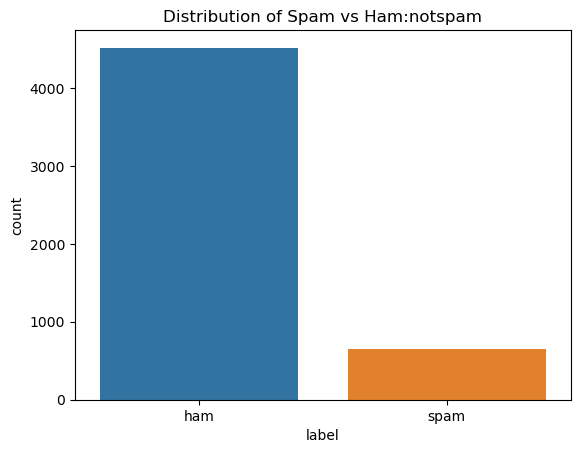

In [21]:
# Visualiation distribution of spam vs ham(not spam) messages 
sns.countplot(x='label', data=cleaned_df)
plt.title('Distribution of Spam vs Ham:notspam')
plt.show()

/var/folders/2g/9_hmst594_72vjd1f22xng4w0000gn/T/ipykernel_18359/3110299407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['message_length'] = cleaned_df['message'].apply(len)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


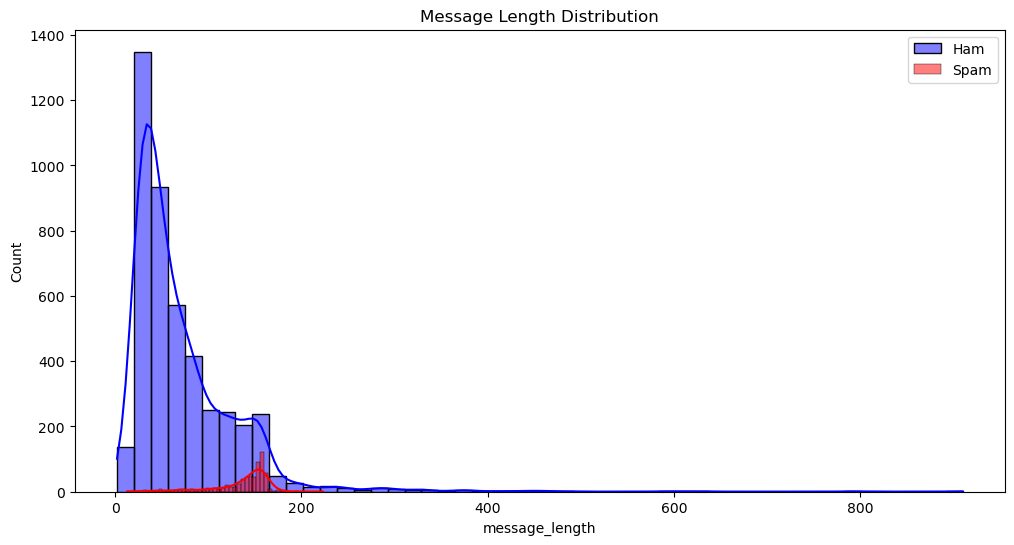

In [24]:
# visualize the message length 
cleaned_df['message_length'] = cleaned_df['message'].apply(len)
plt.figure(figsize=(12,6))
sns.histplot(cleaned_df[cleaned_df['label']=='ham']['message_length'], label='Ham', color='blue', bins=50, kde=True)
sns.histplot(cleaned_df[cleaned_df['label']=='spam']['message_length'], label='Spam', color='red', bins=50, kde=True)
plt.title('Message Length Distribution')
plt.legend()
plt.show()

In [25]:
# Visualization: Words Clouds for spam and ham messages 
spam_words =''.join(cleaned_df[cleaned_df['label']=='spam']['message'])
ham_words =''.join(cleaned_df[cleaned_df['label']=='ham']['message'])

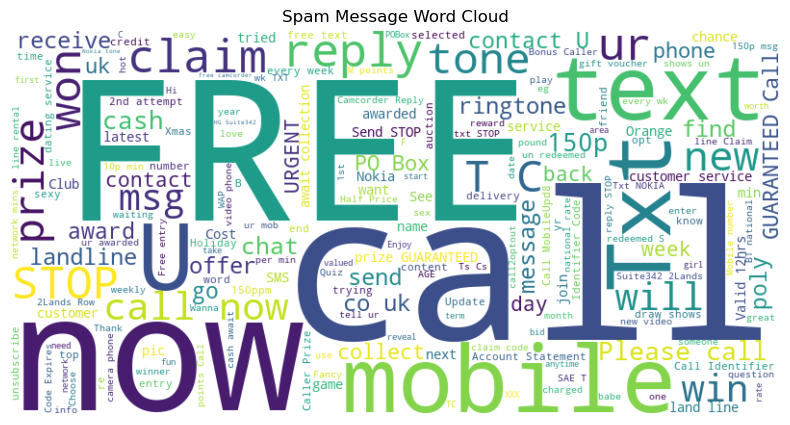

In [28]:
# For spam message
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
plt.figure(figsize=(10,5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Message Word Cloud')
plt.axis('off')
plt.show()

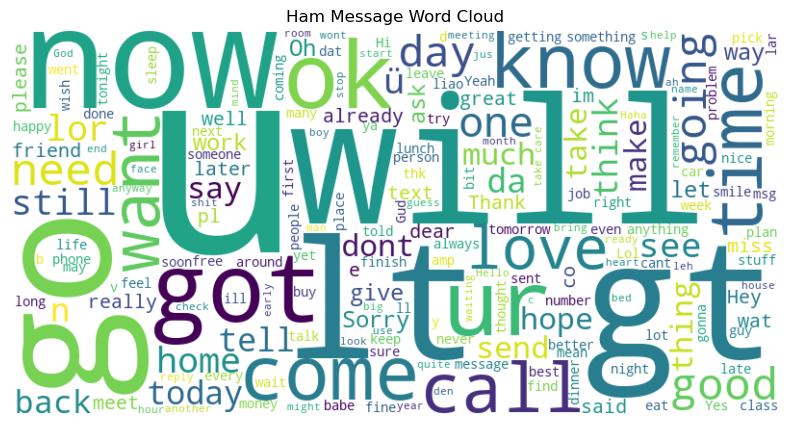

In [31]:
# For ham message
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(10,5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Message Word Cloud')
plt.axis('off')
plt.show()